<a href="https://colab.research.google.com/github/uday-1729/Relaxation_simulations/blob/main/CEST_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.linalg import expm
import math

pi = math.pi

In [21]:
# Populations of the two states Pa and Pb
Pa = 0.95
Pb = 1 - Pa

del_w = -560

# A exchange time period of 73 sec
Kex = 73

# Field strength of 15Hz is taken for this example


# Individual rate constants of the two states
Kab = Pa * Kex
Kba = Pb * Kex

# Relaxation rate constants of the two states
R1_a = 1.7
R2_a = 15

R1_b = 2
R2_b = 25

# R1_a = R1_b = 1

# R2_a = R2_b =10

# Inital M0 matrix for final calculations


# The spectral sweep is at 20Hz
# omg = np.arange(-900 , 920 , 20 )




# wa = 110*80*2*pi
# wb = 117*80*2*pi

ang = ((2*pi*80*10e6)+(118*80))

T_ex = 0.4

In [27]:
def CEST(offlow, offhigh, space, field, del_wf=del_w):
  w1 = 2*pi*field

  w1c = w1*math.cos(0)
  w1s = w1*math.sin(0)

  M0 = np.zeros(shape=(7,1))
  M0[0,0] = 0.5
  M0[3,0] = Pa
  M0[6,0] = Pb
  I0 = 1

  offset = np.arange(offlow , offhigh , space )
  wa = (offset)*2*pi
  wb = (offset - del_w)*2*pi
  I_fin = []

  # for x in range(0 ,len(wa)):
  for x in range(0,len(offset)):
      M = np.array([[0, 0, 0, 0, 0, 0, 0],
          [0 , (-R2_a - Kab), -wa[x] , w1s , Kba , 0 , 0],
          [0 , wa[x] , (-R2_a-Kab) , -w1c , 0 , Kba , 0],
          [2*(R1_a*Pa)*I0 , -w1s , w1c , (-R1_a-Kab), 0 , 0 , Kba],
          [0 , Kab , 0 , 0 , -R2_b - Kba, -(wb[x]) , w1s ],
          [0, 0, Kab , 0, wb[x], (-R2_b - Kba ), -w1c],
          [2 * (R1_b * Pb)*I0, 0 , 0 , Kab , -w1s, w1c, (-R1_b - Kba)],
      ])
      Mt = sp.linalg.expm(M)

      I = np.dot((Mt) , M0)

      I0 = M0[3,0]

      I_ratio = np.divide(I , I0)

      I_fin.append(I_ratio[3,0])

  return I_fin, offset

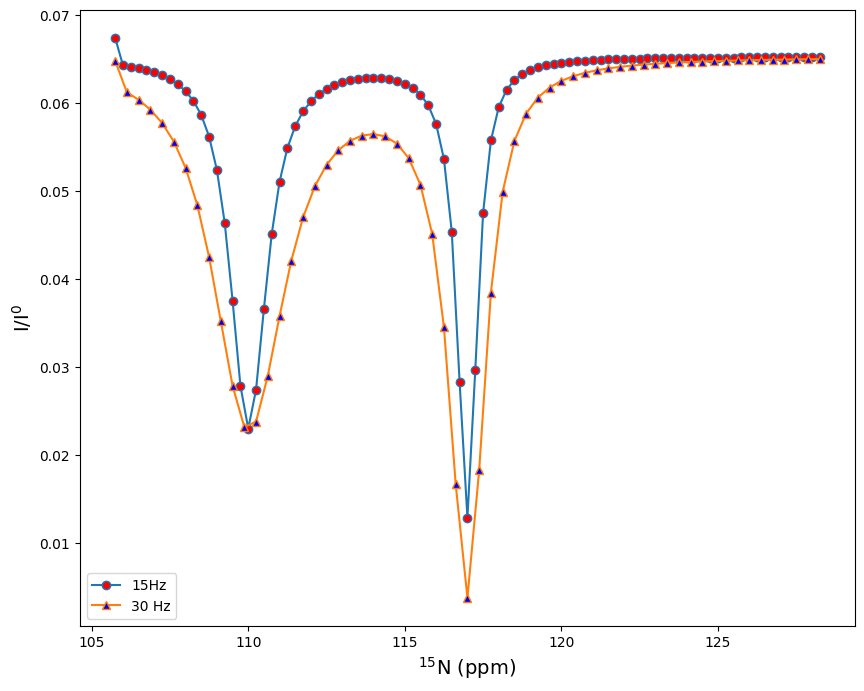

In [29]:
ii0_1, omg = CEST(-900, 920,20,15,del_w)
ii0_2, omg1 = CEST(-900, 920,30,30,del_w)

fig = plt.figure(figsize = (10 ,8))

dof = 117*np.ones(shape=omg.shape)

plt.plot((omg/80 + 117*np.ones(shape=omg.shape)) , ii0_1 , 'o-' , markerfacecolor = 'red', label = '15Hz')
plt.plot((omg1/80 + 117*np.ones(shape=omg1.shape)) , ii0_2 , '^-' , markerfacecolor = 'blue' , label = '30 Hz')
# plt.xlim(-900 , 900 )
plt.xlabel(r"$^{15}$N (ppm)" , fontsize = 14)
plt.ylabel(r"I/I$^{0}$" , fontsize = 14)
# plt.xticks([i for i  in range(-900,915, 100)])
plt.legend()
plt.show()